# Setup

In [26]:
import numpy as np
from prondict import getIsolated
import lab2_proto as proto
import lab2_tools as tools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from numpy import asarray, savetxt, loadtxt
import pickle

data = np.load('lab2_data.npz', allow_pickle=True)['data']

example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()
phoneHMMs_fem = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
phoneHMMs_all = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()

isolated = getIsolated()

wordHMMs_all = {}
for key in isolated.keys():
    wordHMMs_all[key] = proto.concatHMMs(phoneHMMs_all, isolated[key])

wordHMMs_fem = {}
for key in isolated.keys():
    wordHMMs_fem[key] = proto.concatHMMs(phoneHMMs_fem, isolated[key])


# 5.1 Gaussian emission probabilities

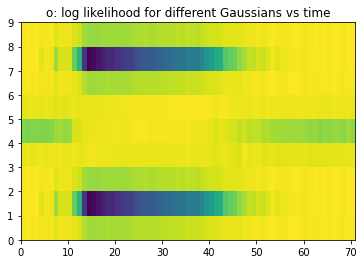

In [27]:
#wordHMMs_fem = {}
#wordHMMs_fem['o'] = proto.concatHMMs(phoneHMMs_fem, isolated['o'])
obsloglik = tools.log_multivariate_normal_density_diag(example['lmfcc'],wordHMMs_fem['o']["means"],wordHMMs_fem['o']["covars"])

if not np.allclose(obsloglik,example['obsloglik']):
        raise Exception("obsloglik broken")

plt.pcolormesh(obsloglik.T)
plt.title("o: log likelihood for different Gaussians vs time")
plt.show()

One can clearly see that the absence of Guassian distribution 4-5 reveals the silence before the uttererance "o" is spoke. 

# 5.2 Forward Algorithm

In [28]:
logalpha = proto.forward(obsloglik,np.log(wordHMMs_fem['o']["startprob"]),np.log(wordHMMs_fem['o']["transmat"]))
if not np.allclose(logalpha,example['logalpha']):
        raise Exception("forward broken")

loglik = proto.loglik(logalpha[-1,:])
if not np.allclose(loglik,example['loglik']):
        raise Exception("loglik broken")

Scoring whole data set with all words using forward algorithm

x-axis ['o', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y-axis ['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']


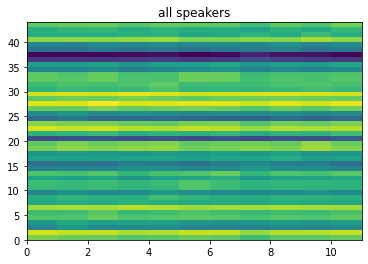

x-axis ['o', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y-axis ['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']


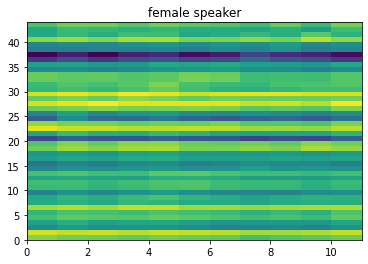

In [29]:
#------------
# score_table_all = proto.score_data(data,wordHMMs_all)
# score_table_fem = proto.score_data(data,wordHMMs_fem)

# pickle.dump(score_table_all, open( "score_table_all.p", "wb" ) )
# pickle.dump(score_table_fem, open( "score_table_fem.p", "wb" ) )
#-------
score_table_all = pickle.load( open( "score_table_all.p", "rb" ) )
score_table_fem = pickle.load( open( "score_table_fem.p", "rb" ) )

score_matrix_all, word_list_all, digit_list_all = proto.table2matrix(score_table_all)
score_matrix_fem, word_list_fem, digit_list_fem = proto.table2matrix(score_table_fem)

print("x-axis", word_list_all)
print("y-axis",digit_list_all)
plt.pcolormesh(score_matrix_all)
plt.title("all speakers")
plt.show()
print("x-axis", word_list_fem)
print("y-axis",digit_list_fem)
plt.pcolormesh(score_matrix_fem)
plt.title("female speaker")
plt.show()



Now only picking the highest likelihood.

In [30]:
best_fit_list_all = proto.pickbestfit(score_matrix_all,word_list_all)

print("ALL SPEAKER DATA")
print("Utterance:",digit_list_all)
print("Best fit:",best_fit_list_all)

best_fit_list_fem = proto.pickbestfit(score_matrix_fem,word_list_fem)

print("ONE SPEAKER DATA")
print("Utterance:",digit_list_fem)
print("Best fit:",best_fit_list_fem)


ALL SPEAKER DATA
Utterance: ['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']
Best fit: ['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '1', '9']
ONE SPEAKER DATA
Utterance: ['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']
Best fit: ['o', 'o', 'z', 'z', '3', '9', '3', '2', '3', '3', '4', '4', '3', '3', '6', '6', '3', '3', '3', '3', '9', 'z', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']


Above one sees that only using one speaker generates wrong word scoring more often than if multiple speakers are used. 